# Project - Face Recognition

### Submitted by - Abhik Kar

##### Dated - 27-Sept-2020

##### Description:

Using transfer learning on an already trained model, objective is to build a face identification model to recognize faces.

##### Objective:
The objective of the project is to build a deep learning model using pre-trained model which is trained on Face recognition to recognize similar faces. Goal is recognizing whether two given faces are of the same person or not.


In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#### Mounting Google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Loading the Dataset
* Aligned Face Dataset from Pinterest
* This dataset contains 10.770 images for 100 people.
* All images are taken from 'Pinterest' and aligned using dlib library.

In [4]:
project_path = "/content/drive/My Drive/Deep Learning/Data Set/FaceRecog/"

##### Extract Zip File
* Extract Aligned Face Dataset from Pinterest.zip

In [5]:
from zipfile import ZipFile
with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

In [6]:
!ls

drive  pins  PINS  sample_data


In [7]:
import os
os.listdir("PINS")

['pins_jason isaacs',
 'pins_Tom Cavanagh',
 'pins_brie larson',
 'pins_Krysten Ritter',
 'pins_Stephen Amell',
 'pins_Benedict Cumberbatch',
 'pins_Jim Parsons',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_robert downey jr face',
 'pins_taylor swift',
 'pins_grant gustin face',
 'pins_Aaron Paul',
 'pins_kristen stewart face',
 'pins_Mike Colter',
 'pins_Wentworth Miller',
 'pins_rihanna',
 'pins_Alvaro Morte',
 'pins_amber heard face',
 'pins_barbara palvin face',
 'pins_Jason Momoa',
 'pins_bill gates',
 'pins_selena gomez',
 'pins_margot robbie face',
 'pins_chadwick boseman face',
 'pins_Jeremy Renner',
 'pins_Pedro Alonso',
 'pins_tati gabrielle',
 'pins_sean pertwee',
 'pins_alycia debnam carey face',
 'pins_Dave Franco',
 'pins_Ursula Corbero',
 'pins_Thomas Middleditch',
 'pins_Brit Marling',
 'pins_Natalie Portman ',
 'pins_drake',
 'pins_elizabeth olsen face',
 'pins_Sundar Pichai',
 'pins_Anna Gunn',
 'pins_Caity Lotz',
 'pins_alexandra daddario',
 'pins_Rami Melek',

#### Function to load images
* Define a function to load the images from the extracted folder and map each image with person id

In [8]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
    def to_dict(self):
        return {
            'base': self.base,
            'name': self.name,
            'file': self.file,
        }
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [9]:
print (metadata.shape)
print (metadata.size)
print (metadata)
print(metadata[0])

(10770,)
10770
[PINS/pins_jason isaacs/jason isaacs102_2082.jpg
 PINS/pins_jason isaacs/jason isaacs122_2039.jpg
 PINS/pins_jason isaacs/jason isaacs111_2064.jpg ...
 PINS/pins_Amanda Crew/Amanda Crew60.jpg
 PINS/pins_Amanda Crew/Amanda Crew83.jpg
 PINS/pins_Amanda Crew/Amanda Crew115.jpg]
PINS/pins_jason isaacs/jason isaacs102_2082.jpg


#### Define function to load image
* Define a function to load image from the metadata

In [10]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image
* Load one image using the function "load_image"

In [11]:
image_1 = load_image(metadata[4].image_path())

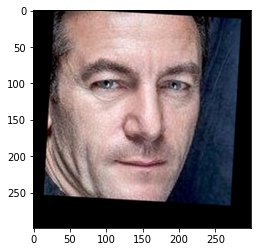

In [12]:
import matplotlib.pyplot as plt
plt.imshow(image_1)

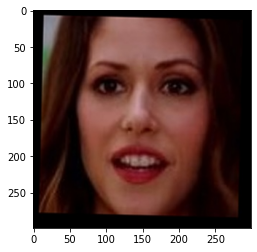

In [13]:
image = load_image("PINS/pins_Amanda Crew/Amanda Crew115.jpg")
plt.imshow(image)

#### VGG Face model
* Predefined model for VGG face

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model
* Load the model defined above
* Then load the given weight file named "vgg_face_weights.h5"

In [15]:
model = vgg_face()
model.load_weights("/content/drive/My Drive/Deep Learning/Data Set/FaceRecog/vgg_face_weights.h5")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

#### **Get vgg_face_descriptor**

In [17]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

#### **Generate embeddings for each image in the dataset**
* Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model.

In [18]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


#### **Generate embeddings for all images**

* Code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

* If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622

In [19]:
from tqdm import tqdm

In [20]:
# Calculate the embedding representation
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in tqdm(enumerate(metadata)):
    img = load_image(m.image_path())
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    # obtain embedding vector for image
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

10770it [13:02, 13.77it/s]


In [21]:
print (embeddings[0])

[ 0.03142381 -0.00592066  0.00919014 ... -0.00691827  0.00194165
 -0.00079342]


In [22]:
print (embeddings[0].shape)

(2622,)


#### Function to calculate distance between given 2 pairs of images
* Consider distance metric as "Squared L2 distance"
* Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [23]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
2, 3 and 2, 180

30, 31 and 30, 100

70, 72 and 70, 115

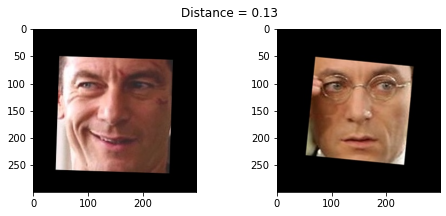

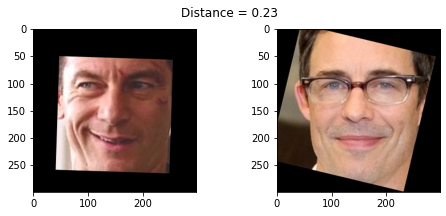

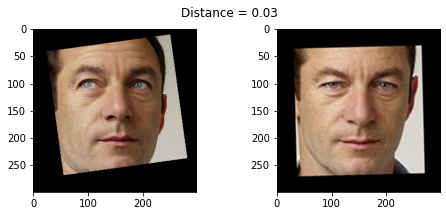

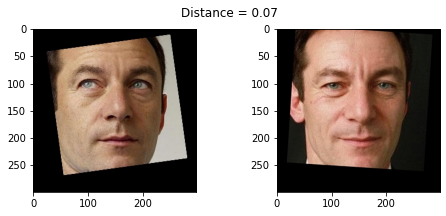

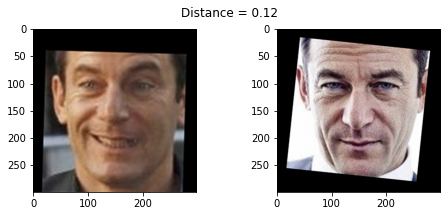

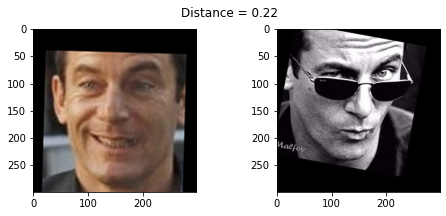

In [24]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair (30,31)
show_pair (30,100)
show_pair (70,72)
show_pair (70,115)

#### Create train and test sets
* Create X_train, X_test and y_train, y_test
* Use train_idx to seperate out training features and labels
* Use test_idx to seperate out testing features and labels

In [25]:
print(metadata[0].name)
print(metadata[0].file)
print(metadata[0].base)
print(metadata[0].image_path())

pins_jason isaacs
jason isaacs102_2082.jpg
PINS
PINS/pins_jason isaacs/jason isaacs102_2082.jpg


In [26]:
metadata.shape

(10770,)

In [27]:
np.shape(embeddings)

(10770, 2622)

In [28]:
import pandas as pd

metadata_panda = pd.DataFrame.from_records([m.to_dict() for m in metadata])
metadata_panda.head(10)

,base,name,file
0,PINS,pins_jason isaacs,jason isaacs102_2082.jpg
1,PINS,pins_jason isaacs,jason isaacs122_2039.jpg
2,PINS,pins_jason isaacs,jason isaacs111_2064.jpg
3,PINS,pins_jason isaacs,jason isaacs103_2055.jpg
4,PINS,pins_jason isaacs,jason isaacs119_2118.jpg
5,PINS,pins_jason isaacs,jason isaacs126_2057.jpg
6,PINS,pins_jason isaacs,jason isaacs143_2044.jpg
7,PINS,pins_jason isaacs,jason isaacs174_2074.jpg
8,PINS,pins_jason isaacs,jason isaacs150_2009.jpg
9,PINS,pins_jason isaacs,jason isaacs106_2024.jpg


In [29]:
metadata_panda.shape

(10770, 3)

In [30]:
y_labels = metadata_panda.name
X = embeddings

#### **Encode the Labels**
* Encode the targets
* Use LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y_labels)
list(lb.classes_)

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [32]:
y = lb.transform(y_labels)
print (y)

[81 81 81 ...  2  2  2]


In [33]:
y.shape

(10770,)

#### **Standardize the feature values**
* Scale the features using StandardScaler

In [34]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_)

[ 0.01083115 -0.0003015   0.00288542 ... -0.01445758  0.00593633
  0.01350416]


In [35]:
X_Scale = scaler.transform(X)

In [36]:
X_Scale.shape

(10770, 2622)

In [37]:
feature_columns = ['feature'+str(i) for i in range(X_Scale.shape[1])]
X_Scale_feature_df = pd.DataFrame(X_Scale,columns=feature_columns)
X_Scale_feature_df.tail(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature2582,feature2583,feature2584,feature2585,feature2586,feature2587,feature2588,feature2589,feature2590,feature2591,feature2592,feature2593,feature2594,feature2595,feature2596,feature2597,feature2598,feature2599,feature2600,feature2601,feature2602,feature2603,feature2604,feature2605,feature2606,feature2607,feature2608,feature2609,feature2610,feature2611,feature2612,feature2613,feature2614,feature2615,feature2616,feature2617,feature2618,feature2619,feature2620,feature2621
10760,1.316679,3.330330,0.157227,0.506952,-0.270671,0.089046,0.224459,1.379280,0.244740,-0.406230,0.920217,2.560970,-0.400344,-1.046341,0.757659,0.150842,1.200450,-0.346355,-0.789607,-0.005539,-2.080409,-0.434934,-0.630820,0.008189,0.150040,-1.071806,0.572398,-0.130266,0.705089,-0.587204,0.599555,-0.201950,1.258599,-0.076267,1.148715,2.601723,-0.027916,-1.027012,-0.135613,-0.852852,...,-1.689349,-1.794218,-1.870732,-1.248914,-0.022215,-0.925267,0.699439,0.737109,-0.502599,-0.140144,-0.539150,-0.589449,0.291071,-0.546536,-0.406740,-0.018616,-1.002200,-0.309450,-0.926107,-0.371015,-0.942523,-0.166590,1.277667,0.692576,-1.073712,-1.085069,-1.194833,-0.176513,-0.740106,0.615288,-1.163758,0.967813,0.949191,-0.036595,-0.229337,-2.423101,-0.616497,-1.118059,0.157525,1.367206
10761,0.379631,-0.968036,-0.377466,-0.477297,-0.524271,0.972987,-0.183794,-0.997425,-0.206519,-0.733356,-0.023761,0.094363,0.553109,0.235649,-0.493866,-0.329834,0.444758,-1.672132,0.554368,-0.114629,-1.383033,-0.968712,-0.635659,1.140449,-0.974183,-1.461247,-1.652224,0.106652,1.263174,0.567186,-0.753258,1.297318,-0.531437,-0.926161,0.042172,1.798330,0.139776,-0.858660,-1.030413,-0.304641,...,-0.259410,-0.479808,-1.319183,-1.179804,-0.670839,-0.298164,-0.182687,-0.538171,-0.638379,-1.054307,0.003433,-1.134024,0.665659,-0.546412,1.522228,-0.235182,-1.627203,1.165494,-0.494684,-0.532851,-0.767611,-1.021496,-0.179168,-0.993956,-0.843883,0.844686,-0.710206,0.520406,-0.704186,0.313235,-1.101429,0.652376,0.228318,0.723271,0.708990,-0.786207,0.015454,0.578706,1.090125,0.869869
10762,0.279656,-0.400744,-1.092034,-0.100324,0.177579,-0.821839,-1.213445,-1.303723,-0.245656,-0.299639,0.050878,0.277470,-0.921713,-0.272626,-0.293866,-0.996862,-0.860517,-1.551648,-0.456815,-0.885260,-1.400216,-1.163460,-1.253104,0.949776,-1.245796,-0.103323,-0.563756,-0.024200,-0.501532,0.124001,0.063474,-0.980832,-0.189177,-1.664716,-0.105843,2.272971,-0.641001,0.014993,-0.459610,-1.857991,...,0.362570,-1.347513,-0.680474,-0.021741,-0.223658,-0.837500,-1.523107,-0.157301,0.533372,-0.557930,-1.247052,-1.002471,0.068871,-0.669545,-0.094852,-0.890605,-1.326826,0.029114,-0.060477,0.854777,-1.543511,0.055551,-0.790646,-0.743053,-0.976347,-0.893946,-1.089649,-0.132212,1.469567,0.550726,-1.254774,0.800493,-0.547483,0.687424,0.924892,0.019310,-0.491156,0.112311,-1.676229,1.058868
10763,0.138700,1.066235,1.217027,-2.149971,0.421043,0.786677,-1.019992,1.373445,1.290900,-0.632149,0.681453,-0.670981,-0.006836,-0.572606,-0.954522,0.237541,1.669985,-0.640311,-0.343875,0.039593,-0.494239,-0.227204,0.028161,-0.153482,-0.181047,-1.868752,-1.749569,0.620062,-0.542730,-0.658798,-0.042050,1.664572,1.366668,-0.903852,0.913398,3.171286,-0.137016,-0.260674,-1.579821,-1.247434,...,-1.537238,-2.286642,-0.674831,-1.715437,-0.875803,0.021240,1.151885,-0.596768,-0.499049,-0.866220,1.258717,-1.356273,0.225793,-0.129865,-1.590294,0.901944,-1.592074,0.311907,-0.923418,0.196819,-0.532313,-1.258012,-0.382410,-0.507391,-0.581181,-0.520583,-2.205542,0.640557,-0.967986,0.433328,0.018390,0.818799,1.792329,-0.677429,2.037761,-2.102416,-0.315582,-0.479643,0.838263,1.733789
1

#### **Reduce dimensions using PCA**
* Reduce feature dimensions using Principal Component Analysis

In [38]:
from sklearn.decomposition import PCA

pca_20 = PCA(n_components=20, whiten=True, svd_solver='full')
X_Scale_PCA20 = pca_20.fit_transform(X_Scale)

print(pca_20.explained_variance_ratio_)

[0.13578596 0.0538297  0.0397352  0.03678221 0.03398456 0.03142341
 0.02575682 0.02349445 0.02097759 0.01933877 0.0181939  0.01708215
 0.01657853 0.01563929 0.01424122 0.01365986 0.01308117 0.01222256
 0.01151444 0.01137169]


#### **Split into training and test set**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scale_PCA20, y, test_size=0.10, random_state=1)

#### Build a Classifier
* Using SVM Classifier to predict the person in the given image
* Fit the classifier and print the score

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
classifier = SVC()
classifier = classifier.fit(X_train,y_train)
print("Best estimator found by grid search:")
print(classifier.get_params)

pred_train = classifier.predict(X_train)

Best estimator found by grid search:
<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


In [41]:
classifier.score(X_train, y_train)

0.9767873723305478

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[ 77   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ...  85   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   0   0 ...   0   0  92]]


In [43]:
pred_test = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9182915506035283

In [44]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[ 8  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 14]]


In [45]:
from sklearn import metrics
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      0.94      0.97        16
           4       0.89      1.00      0.94         8
           5       0.92      1.00      0.96        11
           6       1.00      1.00      1.00         6
           7       0.82      0.90      0.86        10
           8       1.00      1.00      1.00        10
           9       1.00      0.60      0.75        10
          10       0.86      0.75      0.80         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         8
          13       0.50      0.75      0.60         4
          14       1.00      1.00      1.00        12
          15       0.88      0.88      0.88         8
          16       1.00      0.83      0.91         6
          1

#### Test results
* Take 10th image from test set and plot the image
* Identify which person(folder name in dataset) the image belongs to

In [46]:
X_test.shape

(1077, 20)

In [47]:
pred_test[10]

25

In [48]:
example_idx = 10

example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))
print(example_prediction)

[25]


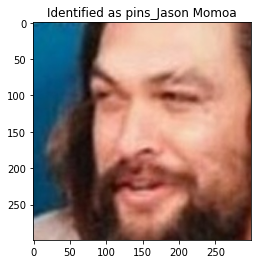

In [49]:
metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

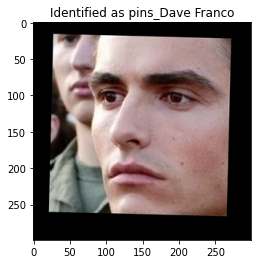

In [50]:
example_idx = 20
example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))

metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

#### Conclusion

* Post evaluation of the test images this is pretty evident that using Predefined model for VGG face and the pre-trained weight along with leveraging the SVM Classifier we are abe to identify the person in the a given image.


### Thank you